In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set()

In [6]:
train = pd.read_csv("Dataset/train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 1 Analyse univariée des données

### 1. PassengerId

Vérification de la singularité des index  

In [55]:
train.PassengerId.nunique()

891

### 2. Survived

\ Observation du nombre de survivant. Données binaires :  
- 0 indiquant le nombre de survivant n'ayant pas survécu
- 1 indiquant le nombre de survivant ayant survécu

<Axes: xlabel='Survived', ylabel='count'>

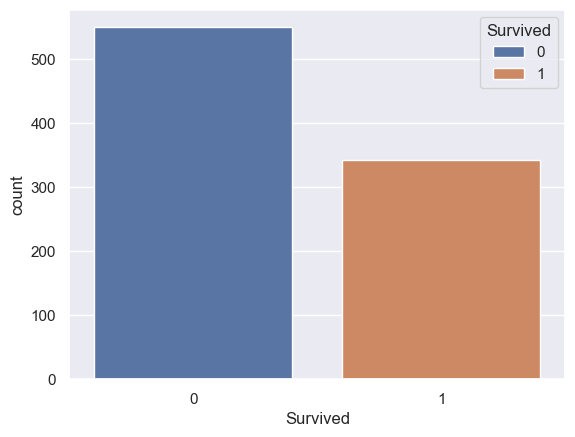

In [70]:
sns.countplot(data=train, x='Survived', hue='Survived')

Nous pouvons observer que le nombre de de survivant est inférieur au nombre de non-survivant

### 3. Pclass

La variable Pclass indique la classe dans laquelle les voyageurs se trouvaient. La 1ère classe rait référence à la classe la plus prestigieuse et la 3ème, la moins prestigieuse.

In [72]:
train.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

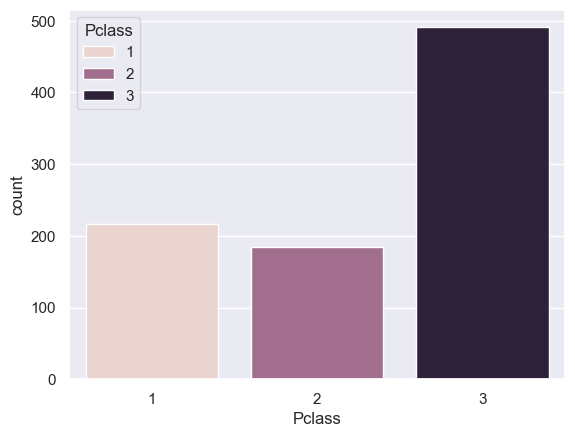

In [74]:
sns.countplot(data=train, x='Pclass', hue='Pclass')

La majeur partie des voyageurs sont dans la 3ème classe. Vient ensuite la 1ère classe.

### 4. Sex

Indique le genre des passagers. Il n'y a pas de valeur nulle dans cette colonne.

In [108]:
train.Sex.isnull().sum()

0

In [97]:
train.Sex.value_counts()*100/len(train)

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64

<Axes: xlabel='Sex', ylabel='count'>

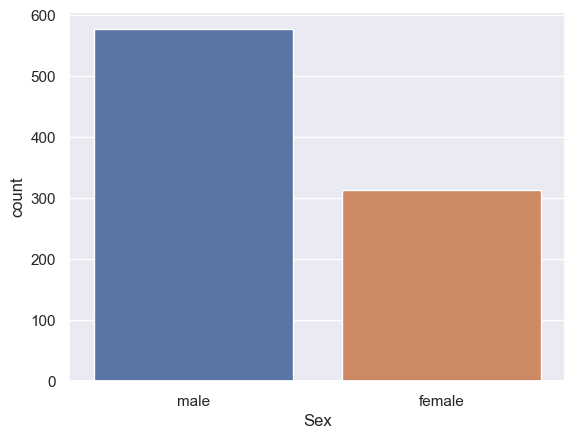

In [106]:
sns.countplot(data=train, x='Sex', hue='Sex')

### 5. Age 

In [112]:
train.Age.isnull().mean()*100

19.865319865319865

In [109]:
train.Age.mean()

29.69911764705882

<Axes: xlabel='Age'>

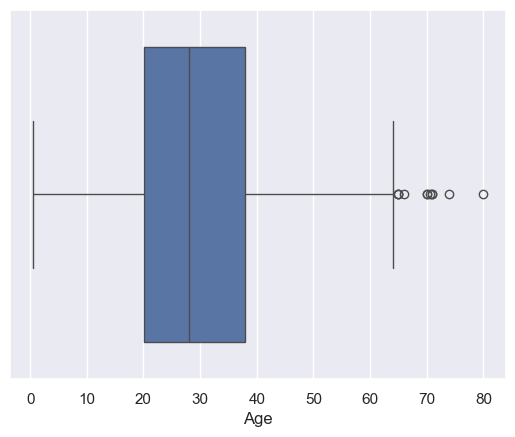

In [117]:
sns.boxplot(data=train, x='Age')

In [ ]:
t

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
train.select_dtypes(exclude='object').corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: xlabel='Parch', ylabel='Age'>

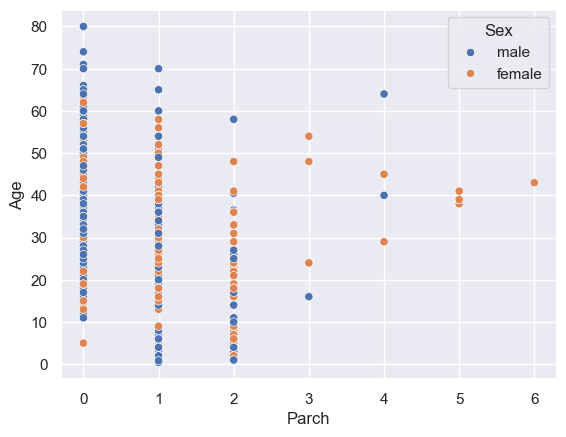

In [33]:
sns.scatterplot(data=train, x='Parch', y='Age', hue='Sex')

In [7]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

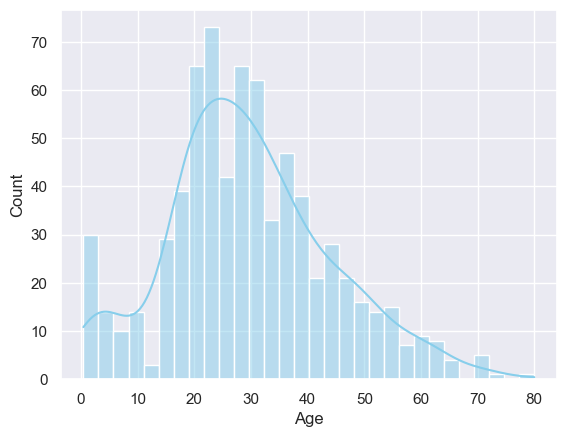

In [17]:
sns.histplot(data=train, x='Age', bins=30, kde=True, color='skyblue')

In [21]:
stat, p_value = stats.shapiro(train.Age.notna())

print(f'Statistique de test : {stat:.4f}')
print(f'P-value : {p_value:.4f}')

Statistique de test : 0.4883
P-value : 0.0000
